                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1468.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:28:13   Log-Likelihood:            -1.1251e+05
No. Observations:               17379   AIC:                         2.250e+05
Df Residuals:                   17374   BIC:                         2.251e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      202.5694      7.065     28.674   

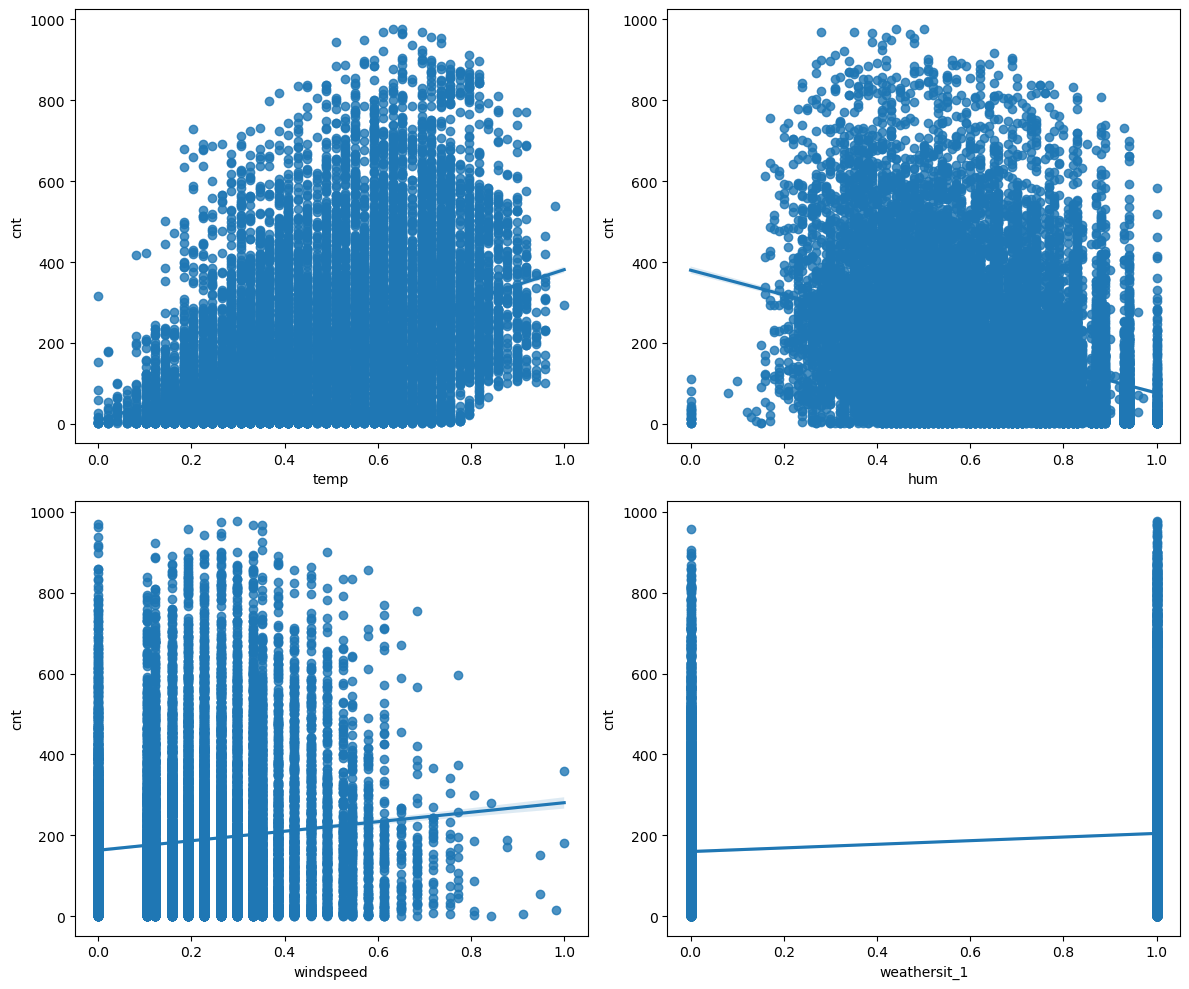

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Connect to the SQLite database
conn = sqlite3.connect('database.db')

# Query to select all data from the table in the database
query = "SELECT * FROM data"

# Load the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Fit a linear regression model with 'temp', 'humidity', 'windspeed', and 'weather'
model = ols('cnt ~ temp + hum + windspeed + weathersit_1', data=df).fit()

# Print the summary of the regression model
print(model.summary())

# Plotting the data
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
sns.regplot(x='temp', y='cnt', data=df, ax=axs[0, 0])
sns.regplot(x='hum', y='cnt', data=df, ax=axs[0, 1])
sns.regplot(x='windspeed', y='cnt', data=df, ax=axs[1, 0])
sns.regplot(x='weathersit_1', y='cnt', data=df, ax=axs[1, 1])
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()
